# An elementary MPL example using Sequential layers

In this Notebook, I'll provide an elementary example of how to use the MPL network with Sequential layers. Specifically, I utilized the cifar10 dataset, which consists of 50,000 32x32 color training images and 10,000 test images, categorized into 10 classes. For additional information on the dataset, please visit the CIFAR homepage. 

Although it's a small dataset, it provides ample opportunities to experiment with various models, techniques, and approaches.

# Import Libraries

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as  pd
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [33]:
# Since the dataset CIFAR10 & 100 are not default, we need to load them did not loaded as a default
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [34]:
cifar10_data = tf.keras.datasets.cifar10

Loads the CIFAR10 dataset.

This is a dataset of 50,000 32x32 color training images and 10,000 test
images, labeled over 10 categories. See more info at the
[CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).

The classes are:

| Label | Description |
|:-----:|-------------|
|   0   | airplane    |
|   1   | automobile  |
|   2   | bird        |
|   3   | cat         |
|   4   | deer        |
|   5   | dog         |
|   6   | frog        |
|   7   | horse       |
|   8   | ship        |
|   9   | truck       |

Returns:
  Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

**x_train**: uint8 NumPy array of grayscale image data with shapes
  `(50000, 32, 32, 3)`, containing the training data. Pixel values range
  from 0 to 255.

**y_train**: uint8 NumPy array of labels (integers in range 0-9)
  with shape `(50000, 1)` for the training data.

**x_test**: uint8 NumPy array of grayscale image data with shapes
  `(10000, 32, 32, 3)`, containing the test data. Pixel values range
  from 0 to 255.

**y_test**: uint8 NumPy array of labels (integers in range 0-9)
  with shape `(10000, 1)` for the test data.

Example:

```python
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

assert x_train.shape == (50000, 32, 32, 3)

assert x_test.shape == (10000, 32, 32, 3)

assert y_train.shape == (50000, 1)

assert y_test.shape == (10000, 1)

In [35]:
(x_train, y_train), (x_test, y_test) = cifar10_data.load_data() #Load cifar10 data

In [36]:
x_train.shape #check the shape of x_train

(50000, 32, 32, 3)

In [37]:
y_train.shape # check the shape ofy_train

(50000, 1)

In [38]:
# Create  a list of labels
labels = [
    'airplane', 
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog', 
    'horse',
    'ship',
    'truck' ]

In [39]:
# Normalization of the data
train_images = x_train /255.
test_images = x_test / 255.
#y_train = y_train /255.
#y_test= y_test/255.


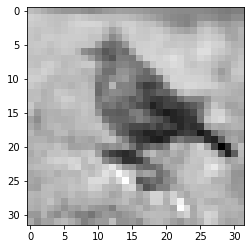

Digit: 2 , lebel: bird


In [40]:
# Here we give an example. In this example we want to see image, label and the anme of the given image.

# Let image number 120
idx = 120
tmp_image , tmp_image_digit , tmp_image_label = train_images[idx,...,1] , y_train[idx,0], labels[y_train[idx ,0]]#this is anindex for y_train
#to slove the above porblem we used labels[y_train[idx ,0]] INSTED OF labels[y_train[idx ]]
#i used here  y_train[idx,0] insted of  y_train[idx] to show the digit as a number not an array
plt.imshow(tmp_image , cmap= 'gray')
plt.show()

print(f'Digit: {tmp_image_digit} , lebel: {tmp_image_label}')

In [41]:
#we biuld a model with a few Sequential layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape =(32,32,3) , name = 'Flatten_layer' ), #here unroll the tensor (32,32,3) to a vector
    tf.keras.layers.Dense(236 , activation = 'relu' , name = 'Hidden_layer_1' ),
    tf.keras.layers.Dense(10 , activation = 'softmax' , name = "Output_layer"),
    # since we have 10 classes, we are using softmax. Note that we have 10 classes (10 labels) 
], name = "first_model")


In [42]:
# Here we set sigmoid activation function for the 'hiddenlayer1'
#model = tf.keras.models.Sequential([
   # tf.keras.layers.Flatten(input_shape =(32,32,3), name = "flatten layer" ), #this will unroll the tensor (32,32,3) to a vector
   # tf.keras.layers.Dense(14 , activation = 'sigmoid' , name = "hidden layer1" ),
   # tf.keras.layers.Dense(10 , activation = 'softmax' , name = "output layer"), #for the last layer we need 10 neuron since we have 10 class
#], name = "second_model")

In [43]:
model.weights[0] # the weights of the first_model

<tf.Variable 'Hidden_layer_1/kernel:0' shape=(3072, 236) dtype=float32, numpy=
array([[ 0.02067453,  0.0094359 ,  0.02902918, ..., -0.01507656,
        -0.03791426,  0.03234905],
       [ 0.0230289 ,  0.00158523, -0.04046752, ...,  0.00676557,
         0.02446793, -0.00966154],
       [ 0.03147763,  0.03890682,  0.00530438, ..., -0.00535917,
        -0.03088421,  0.02243235],
       ...,
       [ 0.03985554, -0.03522573,  0.03067303, ..., -0.01662803,
         0.03116779, -0.00096222],
       [-0.02730435,  0.03535597,  0.02405221, ..., -0.02659239,
         0.0324361 ,  0.00015246],
       [ 0.02107452,  0.03971438,  0.02675223, ..., -0.01217443,
        -0.02009217,  0.04164255]], dtype=float32)>

In [44]:
model.weights[1] # The bias of the frirt_model

<tf.Variable 'Hidden_layer_1/bias:0' shape=(236,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0

In [45]:
model.weights[2] #the weights of the seond layer

<tf.Variable 'Output_layer/kernel:0' shape=(236, 10) dtype=float32, numpy=
array([[ 0.14643416, -0.1508775 , -0.13033435, ..., -0.11428295,
         0.0530027 , -0.00350234],
       [ 0.0628664 , -0.1208204 ,  0.03109673, ...,  0.14429772,
        -0.03513383,  0.0239327 ],
       [-0.13815707, -0.09980802,  0.06150022, ...,  0.04286182,
         0.0407816 , -0.00475976],
       ...,
       [-0.11622389, -0.13440065,  0.10614663, ..., -0.10782488,
        -0.02591905,  0.00462514],
       [ 0.01984949, -0.06522329, -0.1355417 , ...,  0.14678264,
         0.10474971, -0.10531169],
       [-0.09870952,  0.09318571, -0.00451869, ...,  0.033163  ,
        -0.0546818 , -0.03030564]], dtype=float32)>

In [46]:
model.weights[3] #the bias of the seond layer 

<tf.Variable 'Output_layer/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [47]:
model.summary() # Here we check more detils of the model

Model: "first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten_layer (Flatten)     (None, 3072)              0         
                                                                 
 Hidden_layer_1 (Dense)      (None, 236)               725228    
                                                                 
 Output_layer (Dense)        (None, 10)                2370      
                                                                 
Total params: 727,598
Trainable params: 727,598
Non-trainable params: 0
_________________________________________________________________


### The frist method to compile the models

In [48]:
# Here we are going to compile the firdt model

model.compile(optimizer='adam' , loss= "sparse_categorical_crossentropy" ,
              metrics= [tf.keras.metrics.SparseCategoricalCrossentropy()]) 


### The seond method to compile the models


In [49]:
# The seond method to compile the models

#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.6) , loss= 'Sparse_Categorical_Crossentropy' ,
            #  metrics= [tf.keras.metrics.SparseCategoricalCrossentropy()])


In [50]:
# in this step we set fit the model with train_images and y_train  datas and epochs= 10 , batch_size = 32


history = model.fit(x = train_images , y = y_train , epochs= 10 , batch_size = 32)


#num = 10000 # To save time, we fit the model with 10000 images
#history = model.fit(x = train_images[:num] , y = y_train[:num] , epochs= 10 , batch_size = 32)


Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.9000 - sparse_categorical_crossentropy: 1.9000
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.7288 - sparse_categorical_crossentropy: 1.7288 2s - loss: 1.73
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.6769 - sparse_categorical_crossentropy: 1.6769
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6512 - sparse_categorical_crossentropy: 1.6512
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.6365 - sparse_categorical_crossentropy: 1.6365
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6200 - sparse_categorical_crossentropy: 1.6200
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6098 - sparse_categorical_crossentropy: 1.6098
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6018 - sparse_c

In [51]:
# Here I want to see the training details  
for k , v in history.__dict__.items():
    print(k),
    print('-----------'),
    print(v),
    print('************')

validation_data
-----------
None
************
model
-----------
************
_chief_worker_only
-----------
None
************
_supports_tf_logs
-----------
False
************
history
-----------
{'loss': [1.9000390768051147, 1.7288084030151367, 1.6768524646759033, 1.6511651277542114, 1.6364723443984985, 1.6200342178344727, 1.6097887754440308, 1.601794958114624, 1.5950515270233154, 1.5888303518295288], 'sparse_categorical_crossentropy': [1.9000390768051147, 1.7288084030151367, 1.6768524646759033, 1.6511651277542114, 1.6364723443984985, 1.6200342178344727, 1.6097887754440308, 1.601794958114624, 1.5950515270233154, 1.5888303518295288]}
************
params
-----------
{'verbose': 1, 'epochs': 10, 'steps': 1563}
************
epoch
-----------
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
************


In [52]:
# We use pandas DataFrame to see loss and sparse_categorical_crossentropy
df = pd.DataFrame(history.history)
df

,loss,sparse_categorical_crossentropy
0,1.900039,1.900039
1,1.728808,1.728808
2,1.676852,1.676852
3,1.651165,1.651165
4,1.636472,1.636472
5,1.620034,1.620034
6,1.609789,1.609789
7,1.601795,1.601795
8,1.595052,1.595052
9,1.588830,1.588830


[Text(0.5, 0, '#epoch'), Text(0, 0.5, 'loss')]

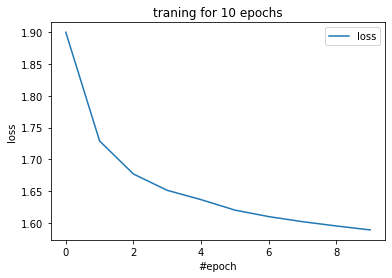

In [53]:
#plot the pandas data frame
what_to_see = 'loss'
my_plot = df.plot(y=what_to_see , title = 'traning for 10 epochs', legend = what_to_see)
my_plot.set(xlabel ='#epoch' , ylabel = what_to_see)

[Text(0.5, 0, '#epoch'), Text(0, 0.5, 'sparse_categorical_crossentropy')]

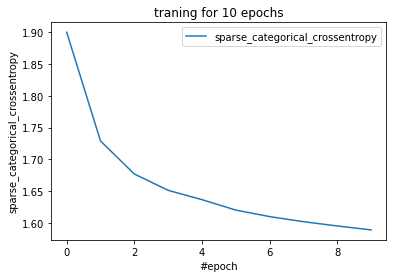

In [54]:
#plot the pandas data frame
what_to_see = 'sparse_categorical_crossentropy'
my_plot = df.plot(y=what_to_see , title = 'traning for 10 epochs', legend = what_to_see)
my_plot.set(xlabel ='#epoch' , ylabel = what_to_see)

### Prediction

Here we take an image and try to predict its class using the first model

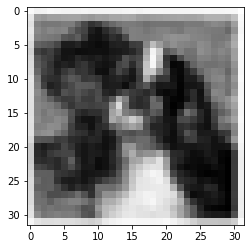

Digit: 5 , lebel: dog


In [56]:
idx = 500

tmp_image , tmp_image_digit , tmp_image_label = train_images[idx,...,1] , y_train[idx,0], labels[y_train[idx ,0]]#this is anindex for y_train
#to slove the above porblem we used labels[y_train[idx ,0]] INSTED OF labels[y_train[idx ]]
#i used here  y_train[idx,0] insted of  y_train[idx] to show the digit as a number not an array
plt.imshow(tmp_image , cmap= 'gray')
plt.show()

print(f'Digit: {tmp_image_digit} , lebel: {tmp_image_label}')

### Evaluateing the model


In [57]:
test_labels =y_test[...,0]

loss,metric = model.evaluate(test_images, y_test, batch_size=32, verbose=1)

313/313 [==============================] - 3s 6ms/step - loss: 1.5893 - sparse_categorical_crossentropy: 1.5893


#Recall:

train_images = x_train /255.

test_images = x_test / 255.

y_train = y_train 

y_test= y_test


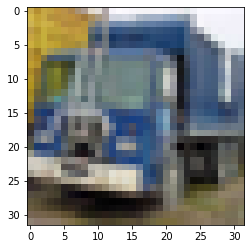

Digit: 9 , lebel: truck


In [61]:
#check some example
idx = 14

tmp_image = test_images[ idx]
tmp_image_digit = y_test[idx,0]
tmp_image_label = labels[y_test[idx,0]]
plt.imshow(tmp_image , cmap= 'gray')
plt.show()

print(f'Digit: {tmp_image_digit} , lebel: {tmp_image_label}')

#pred = model.predict(tmp_image)
#print(pred)